# ATL LLM Judge Summary
Summary file: summary__judge-llama-70b.json


In [ ]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

summary_path = Path("summary__judge-llama-70b.json")
if not summary_path.exists():
    for parent in Path.cwd().parents:
        candidate = parent / summary_path.name
        if candidate.exists():
            summary_path = candidate
            break

summary = json.loads(summary_path.read_text())
df = pd.DataFrame([
    {
        'source_file': item['source_file'],
        'accuracy': item['metrics']['accuracy'],
        'evaluated': item['metrics']['total_evaluated'],
        'correct': item['metrics']['correct'],
    }
    for item in summary['per_file']
])
df.sort_values('accuracy', ascending=False)


,source_file,accuracy,evaluated,correct
19,gemma3-27b_baseline_few_shot_seed46__judge-lla...,0.9180,61,56
27,gpt-4.1_baseline_few_shot_seed45__judge-llama-...,0.9180,61,56
38,gpt-5.2_baseline_few_shot_seed46__judge-llama-...,0.9180,61,56
28,gpt-4.1_baseline_few_shot_seed46__judge-llama-...,0.9016,61,55
37,gpt-5.2_baseline_few_shot_seed45__judge-llama-...,0.9016,61,55
...,...,...,...,...
54,llama-8b_baseline_zero_shot_seed42__judge-llam...,0.3934,61,24
84,qwen-3b_baseline_zero_shot_seed42__judge-llama...,0.3115,61,19
73,mistral_baseline_zero_shot_seed43__judge-llama...,0.2459,61,15
77,phi3_baseline_zero_shot_seed42__judge-llama-70...,0.2295,61,14


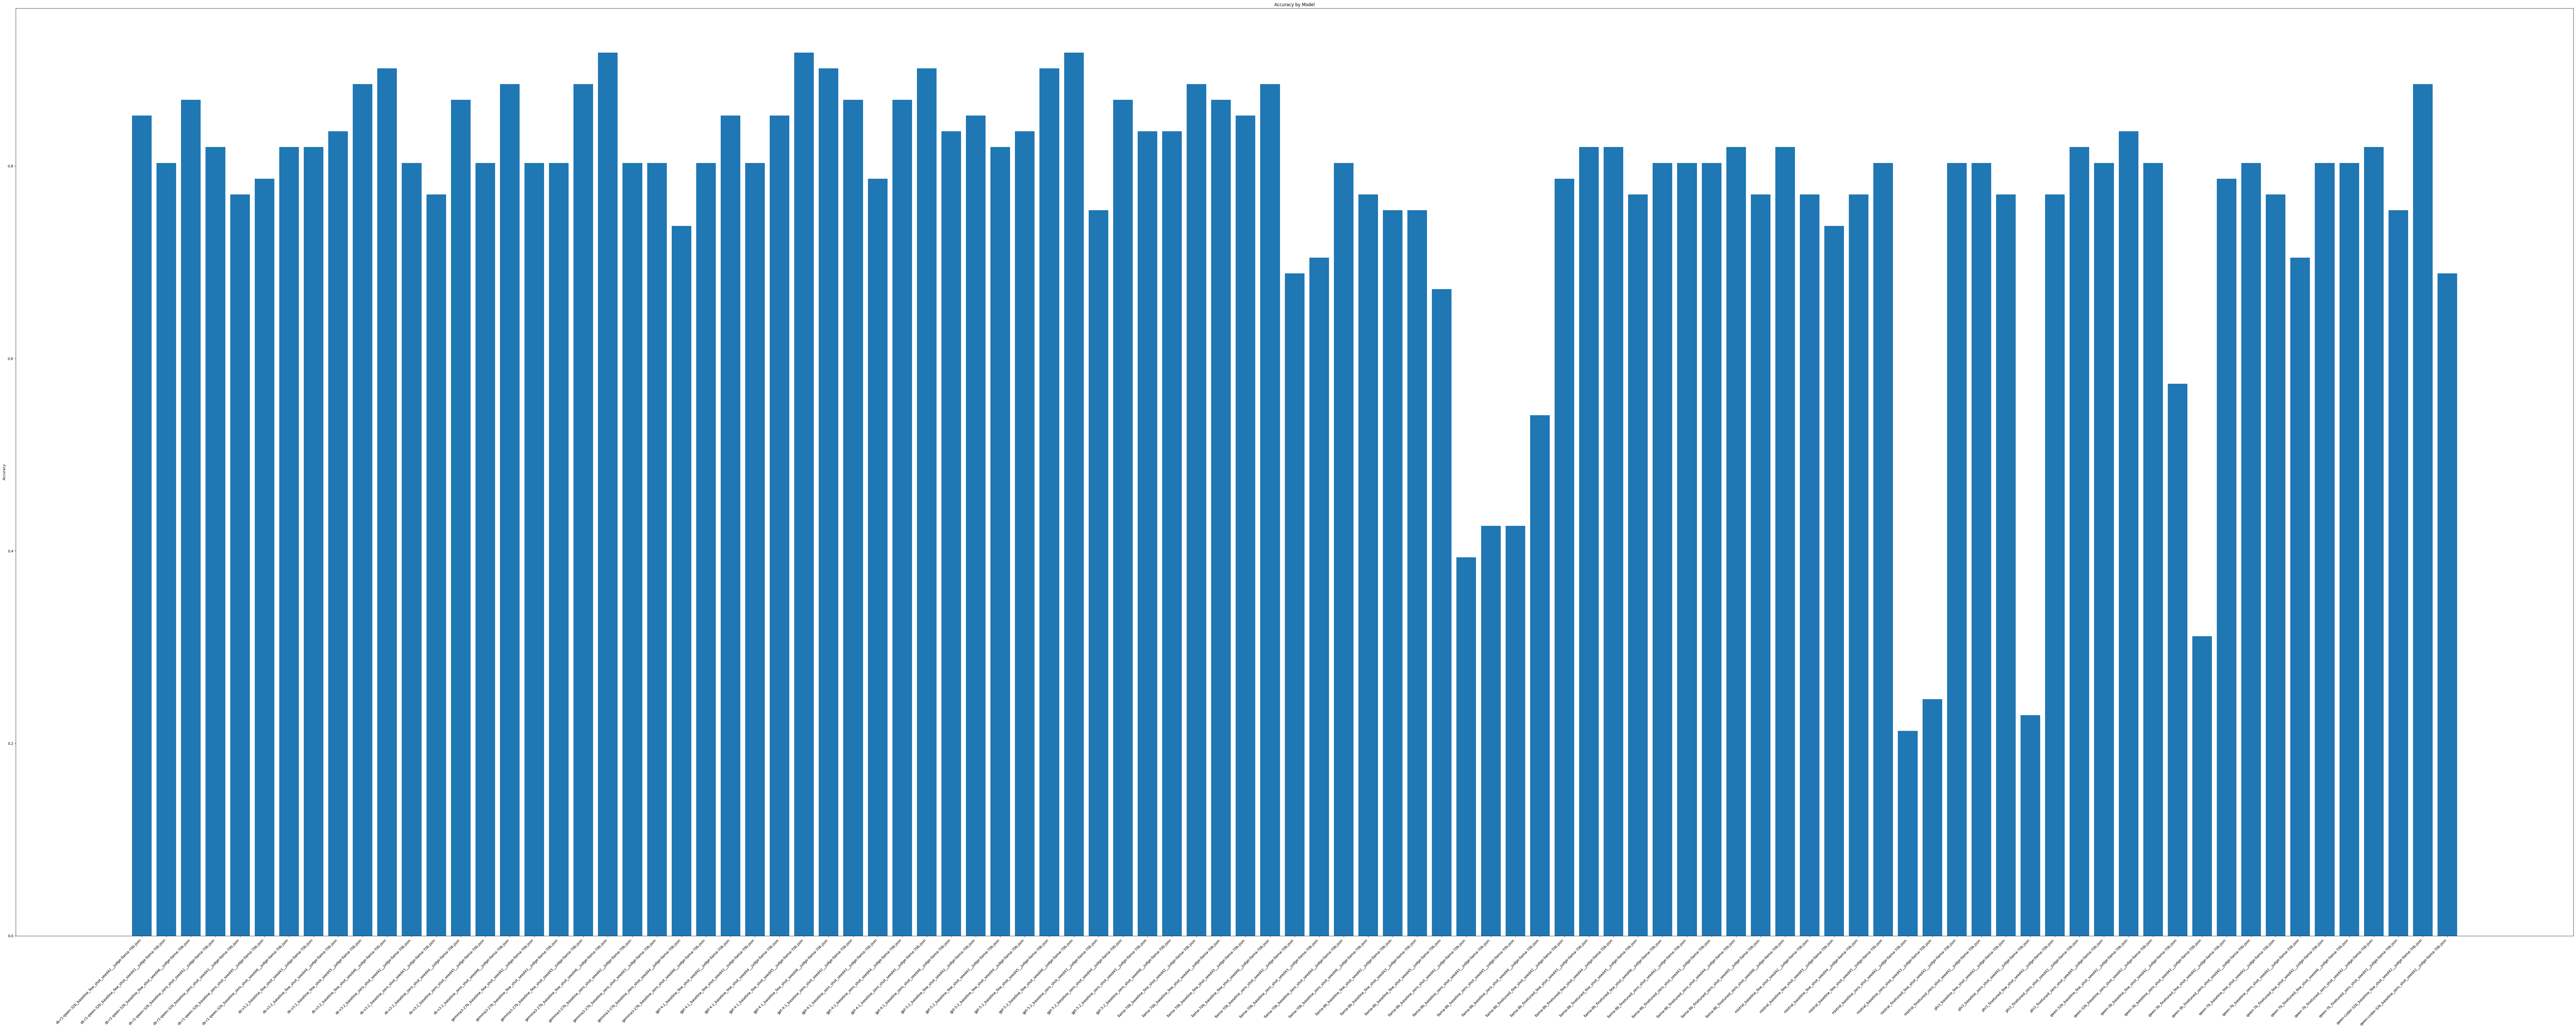

In [ ]:
plt.figure(figsize=(100, 40))
plt.bar(df['source_file'], df['accuracy'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.tight_layout()
plt.show()
